<a href="https://colab.research.google.com/github/Karthik01018/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and preprocess the dataset**

In [1]:
import pandas as pd
df = pd.read_csv('/content/Housing.csv')

 Convert binary categorical columns to numeric (0/1)

In [2]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

**One-hot encode the 'furnishingstatus' column**

In [3]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

**Define features and target**

In [4]:
X = df.drop('price', axis=1)
y = df['price']

**Split data into train-test sets**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Fit a Linear Regression model**

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

** Evaluate model using MAE, MSE, R²**

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6633
R² Score: 0.6529242642153185


**Plot regression line and interpret coefficients**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

**Scatter plot: Actual vs Predicted**

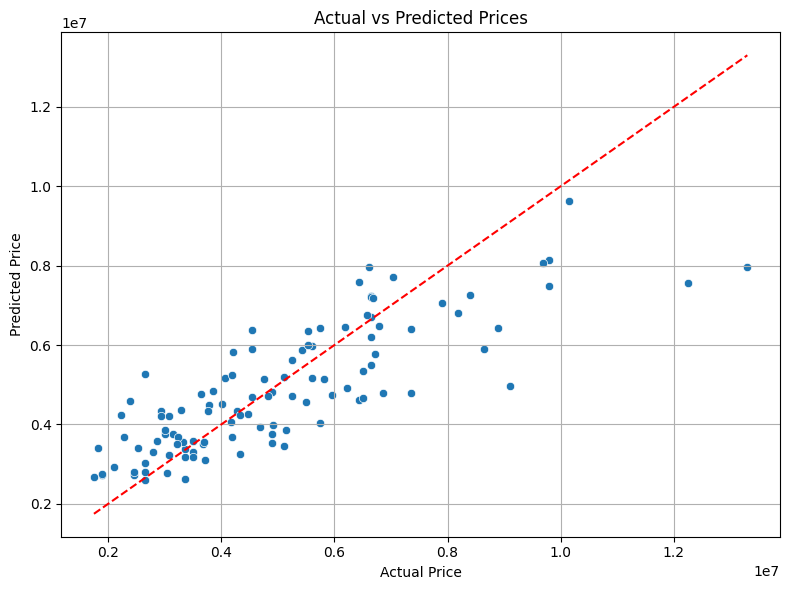

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

**Print coefficients for interpretation**

In [10]:
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:\n", coefficients)


Model Coefficients:
 area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
mainroad                           3.679199e+05
guestroom                          2.316100e+05
basement                           3.902512e+05
hotwaterheating                    6.846499e+05
airconditioning                    7.914267e+05
parking                            2.248419e+05
prefarea                           6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64
